In [1]:
#this is not needed if running locally
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# For this to work add datasets file to Project Root folder, since they're in git ignore they won't be pushed to github
# Load the datasets
emails_data_path = '../emails.csv'
capstone_project_data_path = '../CapstoneProjectData_2024.csv'

In [3]:
# To run this each team member should change the path to their local path for each file
import pandas as pd
emails_data = pd.read_csv(emails_data_path)
capstone_data = pd.read_csv(capstone_project_data_path)


In [4]:
capstone_data_info = capstone_data.info()
emails_data_info = emails_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject     2467 non-null   object 
 1   Body        2571 non-null   object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
dtypes: float64(2), object(2)
memory usage: 80.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


In [5]:
capstone_data_head = capstone_data.head()
emails_data_head = emails_data.head()
print(emails_data_head)
print(capstone_data_head)

                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...
                                             Subject  \
0  ®Review your shipment details / Shipment Notif...   
1                            Υоur ассоunt іѕ оn hоld   
2  Completed: Invoice # KZ89TYS2564 from-Bestbuy....   
3                             UVic IMPORTANT NOTICE!   
4          You have (6) Suspended incoming messages    

                                                Body  Unnamed: 2  Unnamed: 3  
0  Notice: This message was sent from outside the...         NaN         NaN  
1  \r\nVotre réponse a bien été

In [6]:
capstone_data_shape = capstone_data.shape
emails_data_shape = emails_data.shape
print(emails_data_shape)
print(capstone_data_shape)

(517401, 2)
(2576, 4)


## Differences Between Datasets:

**Capstone Project Data (CapstoneProjectData_2024.csv):**
* Entries: 2576
* Columns: 4
* Subject (2467 non-null, object)
* Body (2571 non-null, object)
* Unnamed: 2 (0 non-null, float64)
* Unnamed: 3 (0 non-null, float64)
* Memory Usage: 80.6 KB

**Normal Emails Data (emails.csv):**
* Entries: 517,401
* Columns: 2
* file (517,401 non-null, object)
* message (517,401 non-null, object)
* Memory Usage: 7.9 MB

**Key Differences:**
* Number of Entries:
The Capstone Project Data has 2576 entries.
The Normal Emails Data has 517,401 entries, which is significantly larger.

* Number of Columns:
The Capstone Project Data has 4 columns, but 2 of them (Unnamed: 2 and Unnamed: 3) are completely empty.
The Normal Emails Data has 2 columns: file and message, both fully populated.

* Column Names and Relevance:
The Capstone Project Data has columns Subject and Body, which are typical email components.
The Normal Emails Data has columns file (likely referring to the email file name or ID) and message (the content of the email).

* Missing Values:
The Capstone Project Data has missing values in the Subject (109 missing) and Body (5 missing) columns.
The Normal Emails Data has no missing values.

* Data Types:
Both datasets primarily contain object (string) data types.
The Capstone Project Data also includes two columns with float64 data types, which are entirely empty and can be dropped.

* Memory Usage:
The Normal Emails Data uses significantly more memory (7.9 MB) compared to the Capstone Project Data (80.6 KB), mainly due to the larger number of entries.

Data Cleaning

In [8]:
# We're cleaning Capstone Data (phishing emails) first
# Initial Cleaning for Capstone Project Data
# Drop unnecessary columns
capstone_data_cleaned = capstone_data.drop(columns=['Unnamed: 2', 'Unnamed: 3'])

# Replace missing values in 'Subject' with a space and drop rows where 'Body' is missing
capstone_data_cleaned['Subject'].fillna(' ', inplace=True)
capstone_data_cleaned.dropna(subset=['Body'], inplace=True)

# Normalize text to lowercase
capstone_data_cleaned['Subject'] = capstone_data_cleaned['Subject'].str.lower().str.strip()
capstone_data_cleaned['Body'] = capstone_data_cleaned['Body'].str.lower().str.strip()

print(capstone_data_cleaned)

                                                Subject  \
0     ®review your shipment details / shipment notif...   
1                               υоur ассоunt іѕ оn hоld   
2     completed: invoice # kz89tys2564 from-bestbuy....   
3                                uvic important notice!   
4              you have (6) suspended incoming messages   
...                                                 ...   
2571  update needed (5) inbox messages pending befor...   
2572  update needed (5) inbox messages pending befor...   
2573                            re: all staff/employee,   
2574                                notification update   
2575                         account_alert! api_upgrade   

                                                   Body  
0     notice: this message was sent from outside the...  
1     votre réponse a bien été prise en compte.\r\n[...  
2     notice: this message was sent from outside the...  
3     your uvic account has been filed under the lis...  
4

In [9]:
# Then we clean Emails.csv (normal data)

# Keep only relevant columns for normal emails data
emails_data_cleaned = emails_data[['file', 'message']]

# Normalize text to lowercase
emails_data_cleaned['message'] = emails_data_cleaned['message'].str.lower().str.strip()
print(emails_data_cleaned)

                             file  \
0           allen-p/_sent_mail/1.   
1          allen-p/_sent_mail/10.   
2         allen-p/_sent_mail/100.   
3        allen-p/_sent_mail/1000.   
4        allen-p/_sent_mail/1001.   
...                           ...   
517396  zufferli-j/sent_items/95.   
517397  zufferli-j/sent_items/96.   
517398  zufferli-j/sent_items/97.   
517399  zufferli-j/sent_items/98.   
517400  zufferli-j/sent_items/99.   

                                                  message  
0       message-id: <18782981.1075855378110.javamail.e...  
1       message-id: <15464986.1075855378456.javamail.e...  
2       message-id: <24216240.1075855687451.javamail.e...  
3       message-id: <13505866.1075863688222.javamail.e...  
4       message-id: <30922949.1075863688243.javamail.e...  
...                                                   ...  
517396  message-id: <26807948.1075842029936.javamail.e...  
517397  message-id: <25835861.1075842029959.javamail.e...  
517398  message

Removing certain special characters and unusual formatting entirely could potentially strip away features that are indicative of phishing attempts. Instead, we should be selective about what to clean and what to retain.

Symbols like $, @, #, etc., might indicate phishing attempts

## Steps to Balance the Datasets
1. Random Sampling: Downsample the larger dataset (emails.csv) to match the size of the smaller dataset (CapstoneProjectData_2024.csv).
2. Ensure Class Balance: Make sure both datasets are balanced regarding the number of phishing and normal emails.

In [12]:
# Ensure there's a label column in both datasets
# Phishing emails 1
capstone_data_cleaned['label'] = 1
 # Normal emails 0
emails_data_cleaned['label'] = 0

print(emails_data_cleaned)

                             file  \
0           allen-p/_sent_mail/1.   
1          allen-p/_sent_mail/10.   
2         allen-p/_sent_mail/100.   
3        allen-p/_sent_mail/1000.   
4        allen-p/_sent_mail/1001.   
...                           ...   
517396  zufferli-j/sent_items/95.   
517397  zufferli-j/sent_items/96.   
517398  zufferli-j/sent_items/97.   
517399  zufferli-j/sent_items/98.   
517400  zufferli-j/sent_items/99.   

                                                  message  label  
0       message-id: <18782981.1075855378110.javamail.e...      0  
1       message-id: <15464986.1075855378456.javamail.e...      0  
2       message-id: <24216240.1075855687451.javamail.e...      0  
3       message-id: <13505866.1075863688222.javamail.e...      0  
4       message-id: <30922949.1075863688243.javamail.e...      0  
...                                                   ...    ...  
517396  message-id: <26807948.1075842029936.javamail.e...      0  
517397  message-id:

In [13]:
from sklearn.utils import resample

# Downsample the larger dataset (emails_data) to match the size of the smaller dataset (capstone_data)
emails_data_downsampled = resample(emails_data_cleaned,
                                   replace=False,     # sample without replacement
                                   n_samples=len(capstone_data_cleaned),    # match number in capstone_data
                                   random_state=42)   # reproducible results

In [15]:
print(emails_data_downsampled.shape)

(2571, 3)


In [21]:
#print(emails_data_downsampled.shape)
#print(capstone_data_cleaned.shape)

print(emails_data_downsampled.iloc[0]['message'])
#print(capstone_data_cleaned.head)

message-id: <21013688.1075844564560.javamail.evans@thyme>
date: tue, 29 aug 2000 01:26:00 -0700 (pdt)
from: sara.shackleton@enron.com
to: william.bradford@enron.com
subject: re: credit derivatives
mime-version: 1.0
content-type: text/plain; charset=us-ascii
content-transfer-encoding: 7bit
x-from: sara shackleton
x-to: william s bradford
x-cc: 
x-bcc: 
x-folder: \sara_shackleton_dec2000_june2001_1\notes folders\sent
x-origin: shackleton-s
x-filename: sshackle.nsf

bill:  thanks for the info.   i also spoke with jeff about how 
enroncredit.com ltd. was going to work since dennis o'connell (london lawyer) 
is responsible for that group.  maybe you will be able to clarify which of 
jeff's "positions" will be hedges and which will be backed to enroncredit.  
maybe rod will be handling most of jeff's credit.  i'd appreciate an update.  
sara



	william s bradford
	08/29/2000 07:24 am
		
		 to: sara shackleton/hou/ect@ect
		 cc: mark taylor/hou/ect@ect, paul radous/corp/enron@enron, rod 
nel

In [22]:
print(capstone_data_cleaned.iloc[0]['Body'])

notice: this message was sent from outside the university of victoria email system. please be cautious with links and sensitive information.


[https://www.canadapost-postescanada.ca/cpc/assets/cpc/img/logos/cpc-main-logo.svg]
dear amuench@uvic.ca,

an agent of ours tried to ship a package to your address and no one was home, the package returned to our warehouse. your action is required to establish a new shipment a small fee must be paid, otherwise it will be returned to sender.

to schedule a new shipment just follow the steps bellow:

parcel no: 8857281302282572 - 12/29/2023 10:39:51 am

&gt;&gt;&gt; request new shipment &lt;&lt;&lt; <https://s3.amazonaws.com/ats-nivedhana/nivedhana/44/8/new-schedule.html>

please assure that on the next shipment someone is at the address to receive the parcel.
thank you,
mycanadapost.

2024 mycanadapost
to ensure that you receive future emails, please add
<mailto:hudsonesajoyce@gmail.com>


In [25]:
# Extract relevant columns and rename for consistency
capstone_data_cleaned = capstone_data_cleaned.rename(columns={'Body': 'body', 'Subject': 'title'})
emails_data_cleaned = emails_data_downsampled.rename(columns={'message': 'body', 'Subject': 'title'})

In [27]:
emails_data_cleaned = emails_data_cleaned.drop(columns=['file'])

In [28]:
capstone_data_cleaned = capstone_data_cleaned.drop(columns=['title'])

In [29]:
print(capstone_data_cleaned)
print(emails_data_cleaned)

                                                   body  label
0     notice: this message was sent from outside the...      1
1     votre réponse a bien été prise en compte.\r\n[...      1
2     notice: this message was sent from outside the...      1
3     your uvic account has been filed under the lis...      1
4     message generated from  uvic.ca source.\r\n\r\...      1
...                                                 ...    ...
2571  lawfa@uvic.ca\r\n\r\npending messages, update ...      1
2572  lawfa@uvic.ca\r\n\r\npending messages, update ...      1
2573  all staff/employee,\r\n\r\n\r\n\r\nas covid-19...      1
2574  notice: this message was sent from outside the...      1
2575  esteem user,\r\n\r\n\r\nwe have officially lau...      1

[2571 rows x 2 columns]
                                                     body  label
427616  message-id: <21013688.1075844564560.javamail.e...      0
108773  message-id: <22688499.1075854130303.javamail.e...      0
355471  message-id: <278

In [32]:
# Combine the datasets into one balanced dataset
balanced_data = pd.concat([capstone_data_cleaned, emails_data_cleaned])

# Shuffle the combined dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_data.head)

<bound method NDFrame.head of                                                    body  label
0     message-id: <33301747.1075849651739.javamail.e...      0
1     message-id: <13993836.1075848147889.javamail.e...      0
2     message-id: <19676772.1075845873965.javamail.e...      0
3     message-id: <27480577.1075841318404.javamail.e...      0
4     ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ...      1
...                                                 ...    ...
5137  message-id: <13118033.1075841975765.javamail.e...      0
5138  notice: this message was sent from outside the...      1
5139  message-id: <19107636.1075854475894.javamail.e...      0
5140  message-id: <22749411.1075845539096.javamail.e...      0
5141  <https://un3s.live/rd/c4268avusk822927vfro1600...      1

[5142 rows x 2 columns]>


In [33]:
# Check the class distribution
print(balanced_data['label'].value_counts())

label
0    2571
1    2571
Name: count, dtype: int64


In the context of machine learning and text analysis, "features" refer to the individual measurable properties or characteristics used to make predictions. For text data, features can be derived from the content of the text itself.

1. Word Frequency: The number of times each word appears in the text.
2. Character Count: The total number of characters in the text.
Special Character Count: The number of times special characters (like @, #, $, etc.) appear in the text.
3. Word Count: The total number of words in the text.
4. N-grams: Sequences of N words or characters appearing together in the text (e.g., bigrams are sequences of 2 words).
5. Presence of Specific Words/Phrases: Whether certain keywords or phrases appear in the text.

* Presence of URLs: Phishing emails often contain suspicious URLs.
Unusual Character Patterns: Phishing emails might use obfuscated text with special characters.
* HTML Content: The presence of HTML tags and their complexity.
* Suspicious Words/Phrases: Common phrases used in phishing scams (e.g., "urgent", "click here", "account update").

# We proceed with extracting and creating features for the following:

Presence of URLs: Count the number of URLs in the email.
Unusual Character Patterns: Count special characters that are often used in obfuscated text.
HTML Content: Count the number of HTML tags.
Suspicious Words/Phrases: Check for the presence of specific suspicious words or phrases.
Unusual Characters: Count specific unusual characters that might indicate phishing.

In [47]:
from bs4 import BeautifulSoup
import re

# Function to count HTML tags without removing them
def count_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return len(soup.find_all())

# Function to count URLs
def count_urls(text):
    return len(re.findall(r'http[s]?://', text))

def extract_domain(url):
    domain = re.findall(r'://(?:www\.)?([^/]+)', url)
    return domain[0] if domain else ''

# Function to count special characters
def count_special_characters(text):
    # Use regular expression to find all special characters
    special_chars = re.findall(r'[^\w\s]', text)
    return len(special_chars)

# Function to check for suspicious words/phrases
def contains_suspicious_words(text):
    suspicious_words = ['urgent', 'click here', 'account update', 'verify your account', 'password', 'login']
    return any(word in text for word in suspicious_words)

# Function to extract features from text data
def extract_features(df, text_column):
    df['char_count'] = df[text_column].apply(len)
    df['word_count'] = df[text_column].apply(lambda x: len(x.split()))
    df['special_char_count'] = df[text_column].apply(count_special_characters)
    df['url_count'] = df[text_column].apply(count_urls)
    df['html_tag_count'] = df[text_column].apply(count_html_tags)
    df['contains_suspicious_words'] = df[text_column].apply(contains_suspicious_words)
    df['domains'] = df[text_column].apply(lambda x: [extract_domain(url) for url in re.findall(r'http[s]?://[^\s]+', x)])
    df['unique_domains_count'] = df['domains'].apply(lambda x: len(set(x)))
    return df

In [48]:
# Extract features from the text data
capstone_data_features = extract_features(capstone_data_cleaned, 'body')
emails_data_features = extract_features(emails_data_cleaned, 'body')

# Display the cleaned dataframes with extracted features
print("Capstone Project Data with Features")
print(capstone_data_features.head())
print("\nEmails Data with Features")
print(emails_data_features.head())

<ipython-input-47-7b6ccf69e2e4>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-47-7b6ccf69e2e4>:6: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Capstone Project Data with Features
                                                body  label  char_count  \
0  notice: this message was sent from outside the...      1         960   
1  votre réponse a bien été prise en compte.\r\n[...      1        1331   
2  notice: this message was sent from outside the...      1        3260   
3  your uvic account has been filed under the lis...      1         543   
4  message generated from  uvic.ca source.\r\n\r\...      1        1278   

   word_count  special_char_count  url_count  html_tag_count  \
0         123                  70          2               2   
1         115                  96          3               2   
2         280                 236          9               7   
3          80                  15          1               1   
4         165                  44          2               1   

   contains_suspicious_words  \
0                      False   
1                      False   
2                      False   


## How the Data and Features Help
* Character and Word Counts: These features help understand the typical length and verbosity of phishing vs. normal emails.
* Special Character and URL Counts: Phishing emails might have more obfuscation and links, so these counts can be indicators.
* HTML Tag Count: Many phishing emails use HTML formatting to deceive users, so a higher count might indicate phishing.
* Suspicious Words: Certain phrases are more common in phishing emails, so detecting these can help identify phishing attempts.

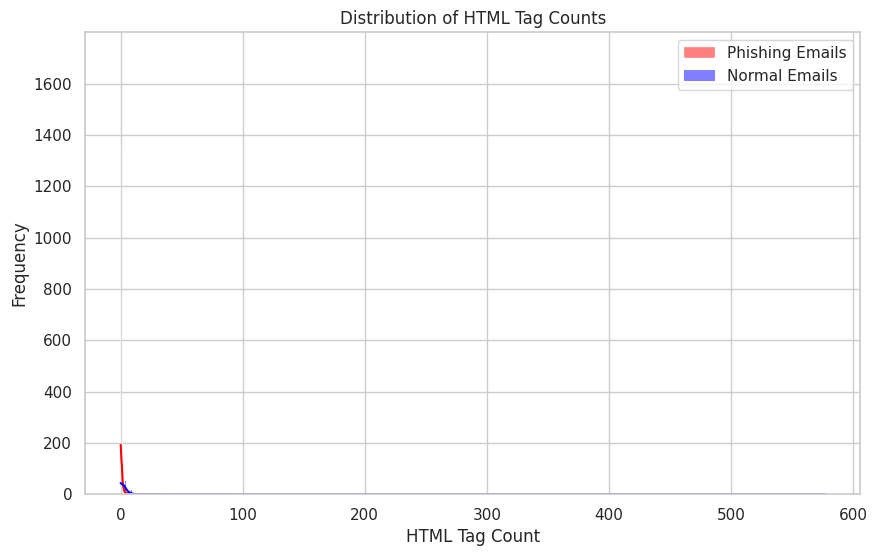

In [42]:
# Plot the HTML tag count
plt.figure(figsize=(10, 6))
sns.histplot(capstone_data_features['html_tag_count'], kde=True, color='red', label='Phishing Emails')
sns.histplot(emails_data_features['html_tag_count'], kde=True, color='blue', label='Normal Emails')
plt.title('Distribution of HTML Tag Counts')
plt.xlabel('HTML Tag Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

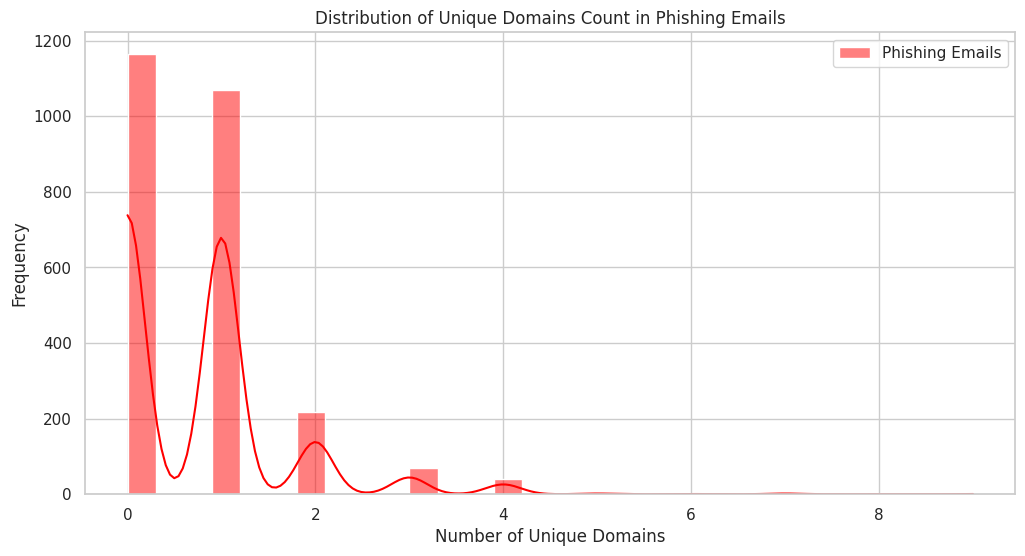

In [51]:
# Plot the distribution of unique domains count for phishing emails
plt.figure(figsize=(12, 6))
sns.histplot(capstone_data_features['unique_domains_count'], kde=True, color='red', label='Phishing Emails', bins=30)
plt.title('Distribution of Unique Domains Count in Phishing Emails')
plt.xlabel('Number of Unique Domains')
plt.ylabel('Frequency')
plt.legend()
plt.show()


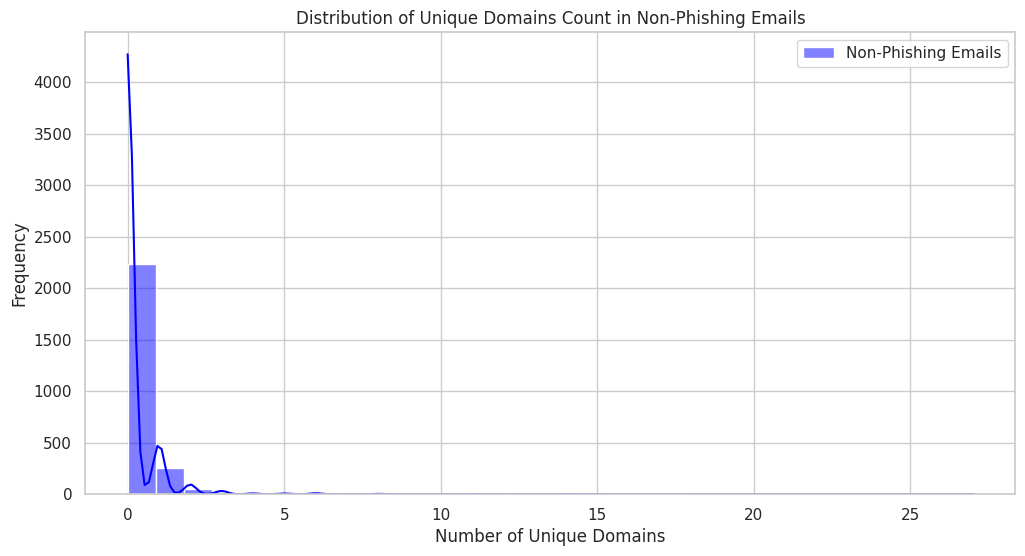

In [52]:
# Plot the distribution of unique domains count for non-phishing emails
plt.figure(figsize=(12, 6))
sns.histplot(emails_data_features['unique_domains_count'], kde=True, color='blue', label='Non-Phishing Emails', bins=30)
plt.title('Distribution of Unique Domains Count in Non-Phishing Emails')
plt.xlabel('Number of Unique Domains')
plt.ylabel('Frequency')
plt.legend()
plt.show()

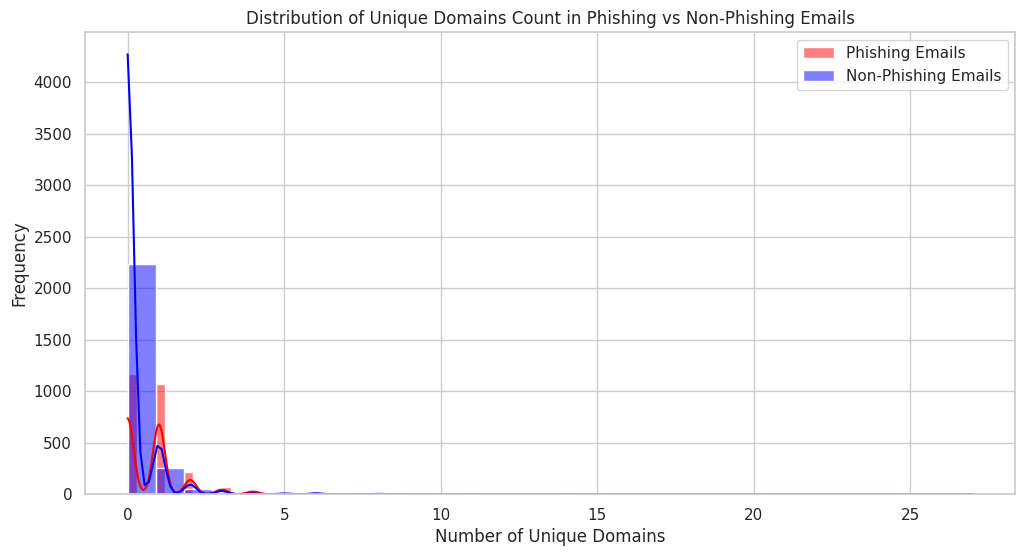

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


# Combined histogram with density lines for direct comparison
plt.figure(figsize=(12, 6))
sns.histplot(capstone_data_features['unique_domains_count'], kde=True, color='red', label='Phishing Emails', bins=30, alpha=0.5)
sns.histplot(emails_data_features['unique_domains_count'], kde=True, color='blue', label='Non-Phishing Emails', bins=30, alpha=0.5)
plt.title('Distribution of Unique Domains Count in Phishing vs Non-Phishing Emails')
plt.xlabel('Number of Unique Domains')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Example of Phishing email with multiple Domains:
Urgent!

Your account has been compromised. Verify your details at http://phishingsite.com/verify.

Also, secure your account by visiting http://malicioussite.com/secure.

Stay safe,
Fake Support Team


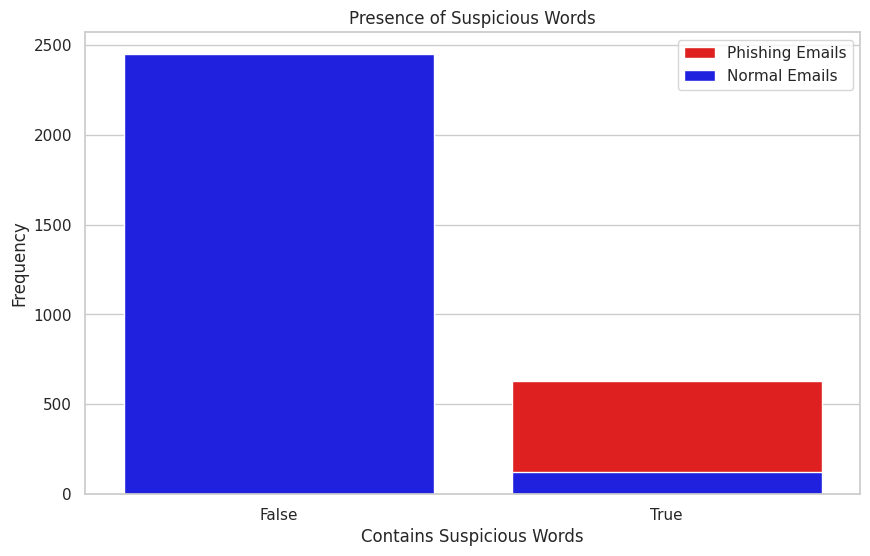

In [43]:
# Plot the presence of suspicious words
plt.figure(figsize=(10, 6))
sns.countplot(x='contains_suspicious_words', data=capstone_data_features, color='red', label='Phishing Emails')
sns.countplot(x='contains_suspicious_words', data=emails_data_features, color='blue', label='Normal Emails')
plt.title('Presence of Suspicious Words')
plt.xlabel('Contains Suspicious Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [57]:
# Save the balanced dataset (without feature extraction) to a CSV file
balanced_data_path = '/content/drive/My Drive/Colab Notebooks/Capstone/balanced_data.csv'
balanced_data.to_csv(balanced_data_path, index=False)

# Print confirmation
print(f"Balanced dataset saved to: {balanced_data_path}")

Balanced dataset saved to: /content/drive/My Drive/Colab Notebooks/Capstone/balanced_data.csv


In [59]:
# Define the file path
# You should define another path
balanced_data_path = '/content/drive/My Drive/Colab Notebooks/Capstone/balanced_data.csv'

# Read the dataset
balanced_data_check = pd.read_csv(balanced_data_path)

# Display the first few rows
print(balanced_data_check.head(15))

                                                 body  label
0   message-id: <33301747.1075849651739.javamail.e...      0
1   message-id: <13993836.1075848147889.javamail.e...      0
2   message-id: <19676772.1075845873965.javamail.e...      0
3   message-id: <27480577.1075841318404.javamail.e...      0
4   ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ...      1
5   notice: this message was sent from outside the...      1
6   message-id: <7395937.1075861374885.javamail.ev...      0
7   notice: this message was sent from outside the...      1
8   notice: this message was sent from outside the...      1
9   message-id: <8443286.1075852612887.javamail.ev...      0
10  message-id: <12048483.1075851753843.javamail.e...      0
11  notice: this message was sent from outside the...      1
12  message-id: <24295734.1075842754893.javamail.e...      0
13  message-id: <19132805.1075844197153.javamail.e...      0
14  message-id: <5997120.1075844986472.javamail.ev...      0
